In [ ]:
#some useful packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
import statsmodels
from scipy import stats
from scipy.stats import levene
import scipy.stats
import math
import random
import statistics
import scipy.stats as sp
from sklearn import linear_model
import seaborn as sns
from scipy.stats import ttest_ind, f_oneway, t
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import MultiComparison
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.multicomp import pairwise_tukeyhsd

!pip install scikit_posthocs
!pip install researchpy
import researchpy as rp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#Data Clean Up

In [ ]:
#load data
df = pd.read_csv('Arrests_and_Strip_Searches_(RBDC-ARR-TBL-001).csv')
df.head()

,Arrest_Year,Arrest_Month,EventID,ArrestID,PersonID,Perceived_Race,Sex,Age_group__at_arrest_,Youth_at_arrest__under_18_years,ArrestLocDiv,...,Actions_at_arrest___Resisted__d,Actions_at_arrest___Mental_inst,Actions_at_arrest___Assaulted_o,Actions_at_arrest___Cooperative,SearchReason_CauseInjury,SearchReason_AssistEscape,SearchReason_PossessWeapons,SearchReason_PossessEvidence,ItemsFound,ObjectId
0,2020,July-Sept,1005907,6017884.0,326622,White,M,Aged 35 to 44 years,Not a youth,54,...,0,0,0,1,NaN,NaN,NaN,NaN,NaN,1
1,2020,July-Sept,1014562,6056669.0,326622,White,M,Aged 35 to 44 years,Not a youth,54,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,2
2,2020,Oct-Dec,1029922,6057065.0,326622,Unknown or Legacy,M,Aged 35 to 44 years,Not a youth,54,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,3
3,2021,Jan-Mar,1052190,6029059.0,327535,Black,M,Aged 25 to 34 years,Not a youth,XX,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,4
4,2021,Jan-Mar,1015512,6040372.0,327535,South Asian,M,Aged 25 to 34 years,Not a youth,XX,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,5


In [ ]:
df.dtypes

Arrest_Year                          int64
Arrest_Month                        object
EventID                              int64
ArrestID                           float64
PersonID                             int64
Perceived_Race                      object
Sex                                 object
Age_group__at_arrest_               object
Youth_at_arrest__under_18_years     object
ArrestLocDiv                        object
StripSearch                          int64
Booked                               int64
Occurrence_Category                 object
Actions_at_arrest___Concealed_i      int64
Actions_at_arrest___Combative__      int64
Actions_at_arrest___Resisted__d      int64
Actions_at_arrest___Mental_inst      int64
Actions_at_arrest___Assaulted_o      int64
Actions_at_arrest___Cooperative      int64
SearchReason_CauseInjury           float64
SearchReason_AssistEscape          float64
SearchReason_PossessWeapons        float64
SearchReason_PossessEvidence       float64
ItemsFound 

In [ ]:
# Replace gender data with numerical values
df['Gender'] = df['Sex'].replace({'M': 1, 'F': 2, 'U': 0})

In [ ]:
#change categorical variables to string type
df[['Arrest_Month', 'Perceived_Race', 'Sex', 'Age_group__at_arrest_',
       'Youth_at_arrest__under_18_years', 'ArrestLocDiv', 'Occurrence_Category', 
       'SearchReason_CauseInjury', 'SearchReason_AssistEscape', 
       'SearchReason_PossessWeapons', 'SearchReason_PossessEvidence', 'ItemsFound']] = df[['Arrest_Month', 'Perceived_Race', 'Sex', 'Age_group__at_arrest_',
       'Youth_at_arrest__under_18_years', 'ArrestLocDiv', 'Occurrence_Category', 
       'SearchReason_CauseInjury', 'SearchReason_AssistEscape', 
       'SearchReason_PossessWeapons', 'SearchReason_PossessEvidence', 'ItemsFound']].astype('string')

In [ ]:
# check for missing values
missing_values = df.isnull().sum()

print(missing_values)

Arrest_Year                            0
Arrest_Month                           0
EventID                                0
ArrestID                             469
PersonID                               0
Perceived_Race                         4
Sex                                    0
Age_group__at_arrest_                 24
Youth_at_arrest__under_18_years        0
ArrestLocDiv                           0
StripSearch                            0
Booked                                 0
Occurrence_Category                  165
Actions_at_arrest___Concealed_i        0
Actions_at_arrest___Combative__        0
Actions_at_arrest___Resisted__d        0
Actions_at_arrest___Mental_inst        0
Actions_at_arrest___Assaulted_o        0
Actions_at_arrest___Cooperative        0
SearchReason_CauseInjury           57475
SearchReason_AssistEscape          57475
SearchReason_PossessWeapons        57475
SearchReason_PossessEvidence       57475
ItemsFound                         57475
ObjectId        

In [ ]:
df = df.dropna(subset=['Perceived_Race', 'Age_group__at_arrest_', 'Occurrence_Category'])

In [ ]:
# count the occurrences of each category
occurrence_count = df['Occurrence_Category'].value_counts()
# get the top 5 categories
top_categories = occurrence_count.head(5)

print(top_categories)

Assault                                   7724
Assault & Other crimes against persons    7234
Robbery & Theft                           4580
Warrant                                   4377
FTA/FTC/Compliance Check/Parollee         4246
Name: Occurrence_Category, dtype: Int64


In [ ]:
# create a boolean mask to select rows with top categories
mask = df['Occurrence_Category'].isin(top_categories.index)

# select only rows with top categories and drop others
df = df.loc[mask]

# check the number of rows
df.nunique()

Arrest_Year                            2
Arrest_Month                           4
EventID                            26706
ArrestID                           27995
PersonID                           19395
Perceived_Race                         8
Sex                                    3
Age_group__at_arrest_                  9
Youth_at_arrest__under_18_years        3
ArrestLocDiv                          18
StripSearch                            2
Booked                                 2
Occurrence_Category                    5
Actions_at_arrest___Concealed_i        2
Actions_at_arrest___Combative__        2
Actions_at_arrest___Resisted__d        2
Actions_at_arrest___Mental_inst        2
Actions_at_arrest___Assaulted_o        2
Actions_at_arrest___Cooperative        2
SearchReason_CauseInjury               2
SearchReason_AssistEscape              2
SearchReason_PossessWeapons            2
SearchReason_PossessEvidence           2
ItemsFound                             2
ObjectId        

In [ ]:
# Change age into numerical number
df['Age_numerical'] = df['Age_group__at_arrest_'].apply(lambda x: 
    17 if x == 'Aged 17 years and younger' else
    21 if x == 'Aged 18 to 24 years' else
    30 if x == 'Aged 25 to 34 years' else
    40 if x == 'Aged 35 to 44 years' else
    50 if x == 'Aged 45 to 54 years' else
    60 if x == 'Aged 55 to 64 years' else
    65 if x == 'Aged 65 years and older' or x == 'Aged 65 and older' else
    None)

<ipython-input-10-571c8c5d89ef>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age_numerical'] = df['Age_group__at_arrest_'].apply(lambda x:


In [ ]:
df.head()


,Arrest_Year,Arrest_Month,EventID,ArrestID,PersonID,Perceived_Race,Sex,Age_group__at_arrest_,Youth_at_arrest__under_18_years,ArrestLocDiv,...,Actions_at_arrest___Assaulted_o,Actions_at_arrest___Cooperative,SearchReason_CauseInjury,SearchReason_AssistEscape,SearchReason_PossessWeapons,SearchReason_PossessEvidence,ItemsFound,ObjectId,Gender,Age_numerical
0,2020,July-Sept,1005907,6017884.0,326622,White,M,Aged 35 to 44 years,Not a youth,54,...,0,1,<NA>,<NA>,<NA>,<NA>,<NA>,1,1,40.0
1,2020,July-Sept,1014562,6056669.0,326622,White,M,Aged 35 to 44 years,Not a youth,54,...,0,0,<NA>,<NA>,<NA>,<NA>,<NA>,2,1,40.0
2,2020,Oct-Dec,1029922,6057065.0,326622,Unknown or Legacy,M,Aged 35 to 44 years,Not a youth,54,...,0,0,<NA>,<NA>,<NA>,<NA>,<NA>,3,1,40.0
4,2021,Jan-Mar,1015512,6040372.0,327535,South Asian,M,Aged 25 to 34 years,Not a youth,XX,...,0,0,<NA>,<NA>,<NA>,<NA>,<NA>,5,1,30.0
5,2021,Apr-June,1019145,6060688.0,327535,South Asian,M,Aged 25 to 34 years,Not a youth,42,...,0,1,<NA>,<NA>,<NA>,<NA>,<NA>,6,1,30.0


In [ ]:
#Setting the top 5 occurrence categories
top_categories = df['Occurrence_Category'].value_counts().nlargest(5).index.tolist()
df_top_categories = df[df['Occurrence_Category'].isin(top_categories)]

In [ ]:
# combine all types of actions at arrest into one variable
df['Actions_at_arrest'] = df['Actions_at_arrest___Concealed_i'] | df['Actions_at_arrest___Combative__'] | df['Actions_at_arrest___Resisted__d'] | df['Actions_at_arrest___Mental_inst'] | df['Actions_at_arrest___Assaulted_o']

#EDA

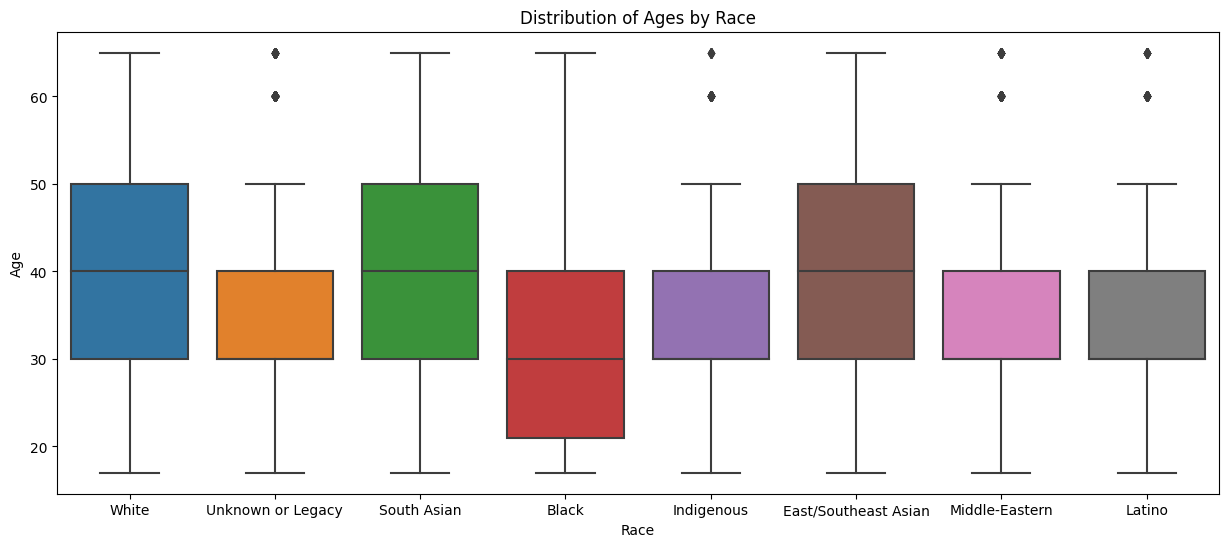

In [ ]:
#Visualization of age and race distribution
plt.figure(figsize=(15, 6))
df = df.dropna(subset=["Age_numerical", "Perceived_Race"])

sns.boxplot(x="Perceived_Race", y="Age_numerical", data=df)
plt.title("Distribution of Ages by Race")
plt.xlabel("Race")
plt.ylabel("Age")
plt.show()

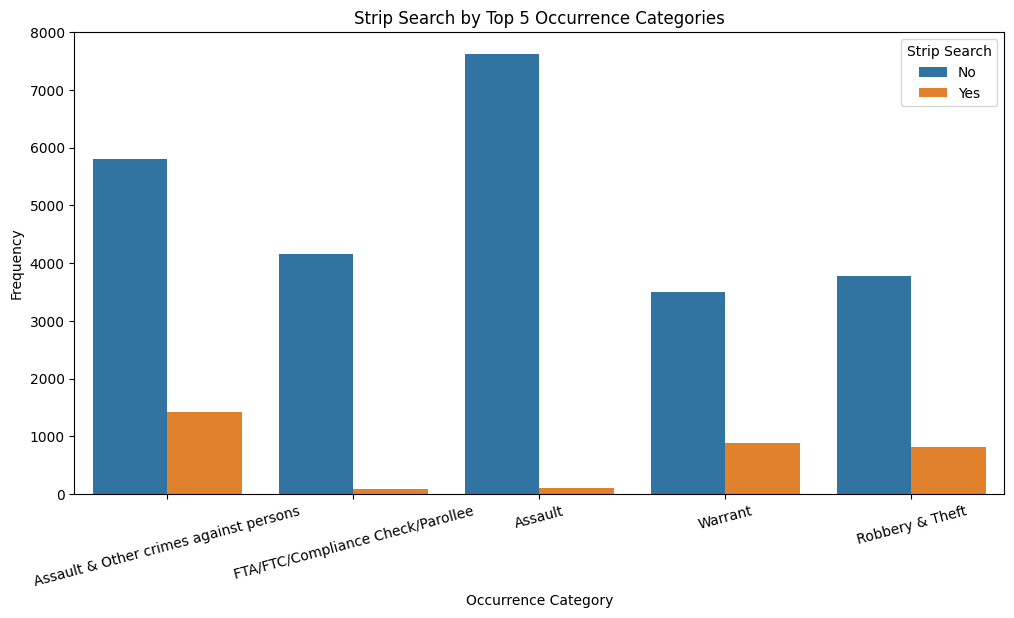

In [ ]:
#Visualization of whether strip searches were conducted in top 5 categories
plt.figure(figsize=(12, 6))
sns.countplot(x='Occurrence_Category', hue='StripSearch', data=df_top_categories)
plt.title('Strip Search by Top 5 Occurrence Categories')
plt.xlabel('Occurrence Category')
plt.ylabel('Frequency')
plt.xticks(rotation=15)
plt.legend(title='Strip Search', labels=['No', 'Yes'])
plt.show()
# Change stripsearch legend from 0 and 1 to Yes and No

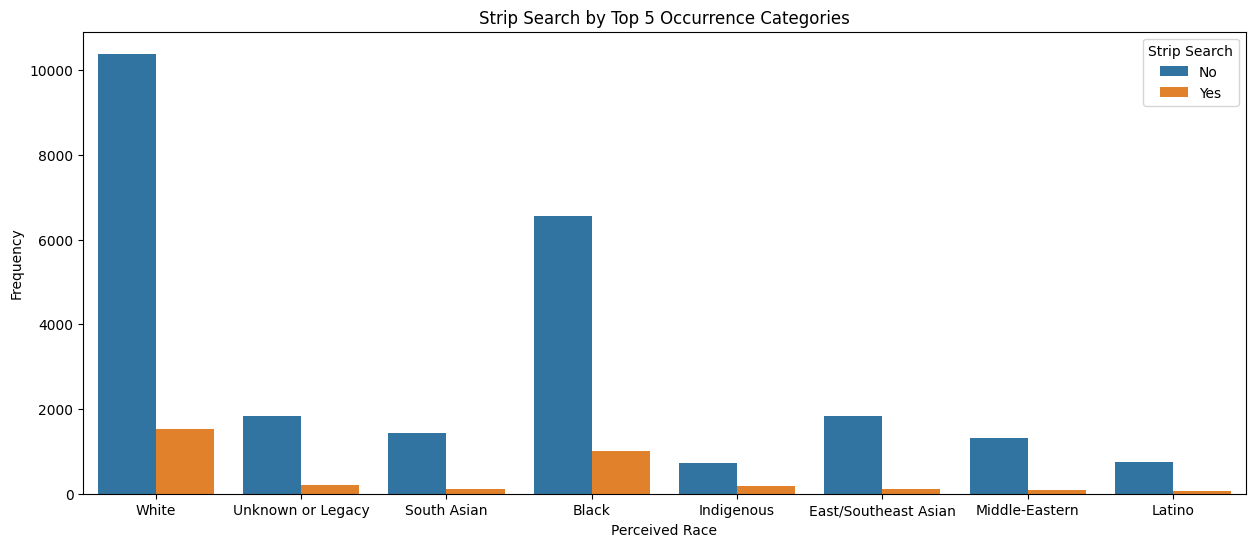

In [ ]:
#Visualization of strip searches based on perceived race
plt.figure(figsize=(15, 6))
sns.countplot(x='Perceived_Race', hue='StripSearch', data=df_top_categories)
plt.title('Strip Search by Top 5 Occurrence Categories')
plt.xlabel('Perceived Race')
plt.ylabel('Frequency')
plt.legend(title='Strip Search', labels=['No', 'Yes'])
plt.show()

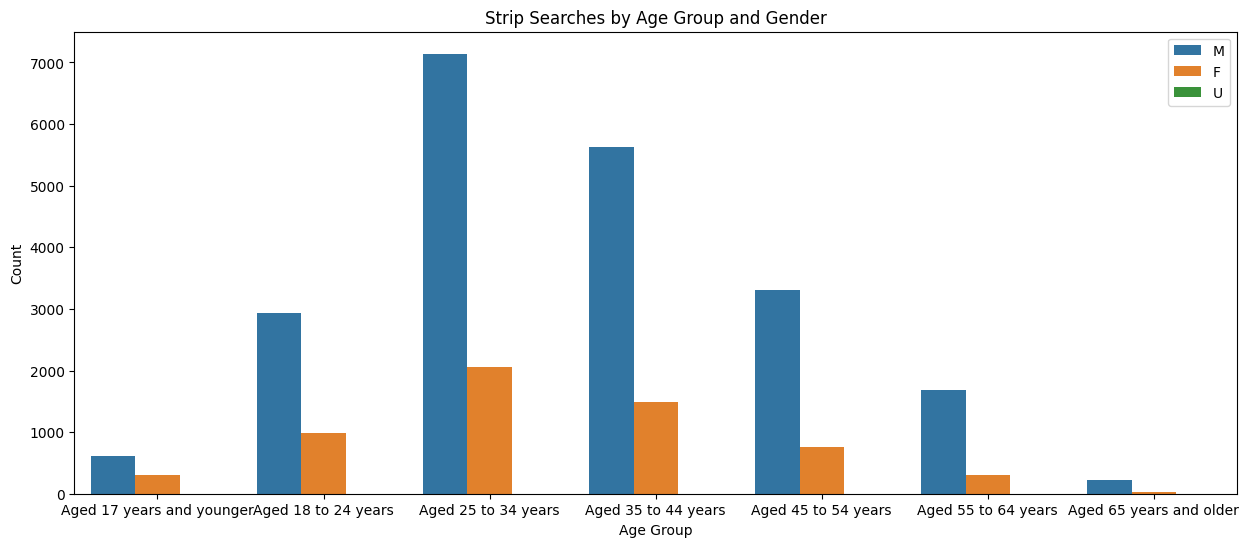

In [ ]:
#Visualization of strip searches based on Age_group and Sex
plt.figure(figsize=(15, 6))
age_categories = ["Aged 17 years and younger", "Aged 18 to 24 years", "Aged 25 to 34 years", 
                  "Aged 35 to 44 years", "Aged 45 to 54 years", "Aged 55 to 64 years", 
                  "Aged 65 years and older"]
df["Age_group__at_arrest_"] = pd.Categorical(df["Age_group__at_arrest_"], categories=age_categories, ordered=True)

sns.countplot(x="Age_group__at_arrest_", hue="Sex", data=df)
plt.title("Strip Searches by Age Group and Gender")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.legend(loc='upper right')
plt.show()

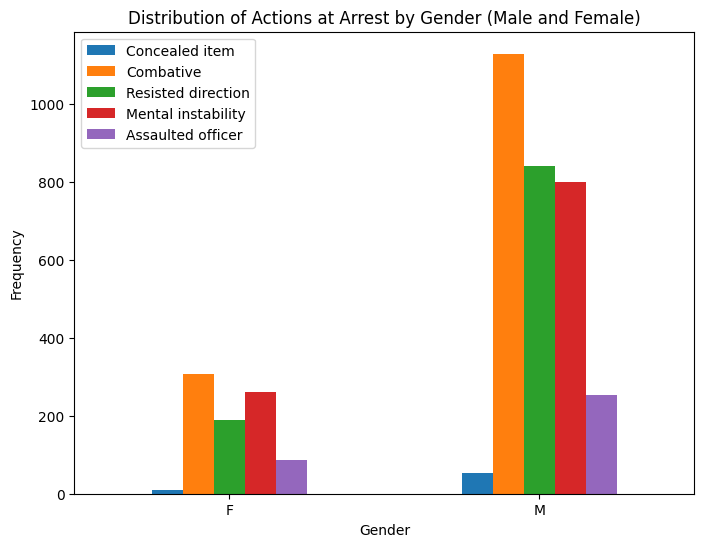

In [45]:
#Actions at Arrest Distribution by Age
df_filtered = df[df['Sex'] != 'U']
actions_at_arrest_df_gender_filtered = df_filtered.groupby('Sex')[actions_at_arrest_reasons].sum()
ax = actions_at_arrest_df_gender_filtered.plot(kind='bar', figsize=(8, 6))

legend_labels = [
    "Concealed item",
    "Combative",
    "Resisted direction",
    "Mental instability",
    "Assaulted officer"
]
ax.legend(legend_labels)

plt.title('Distribution of Actions at Arrest by Gender (Male and Female)')
plt.xlabel('Gender')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

<ipython-input-46-4f446162f112>:21: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  g = sns.catplot(data=df_filtered, x=action_col, y='StripSearch', hue='Sex', col='Perceived_Race', kind='bar', ci=None,


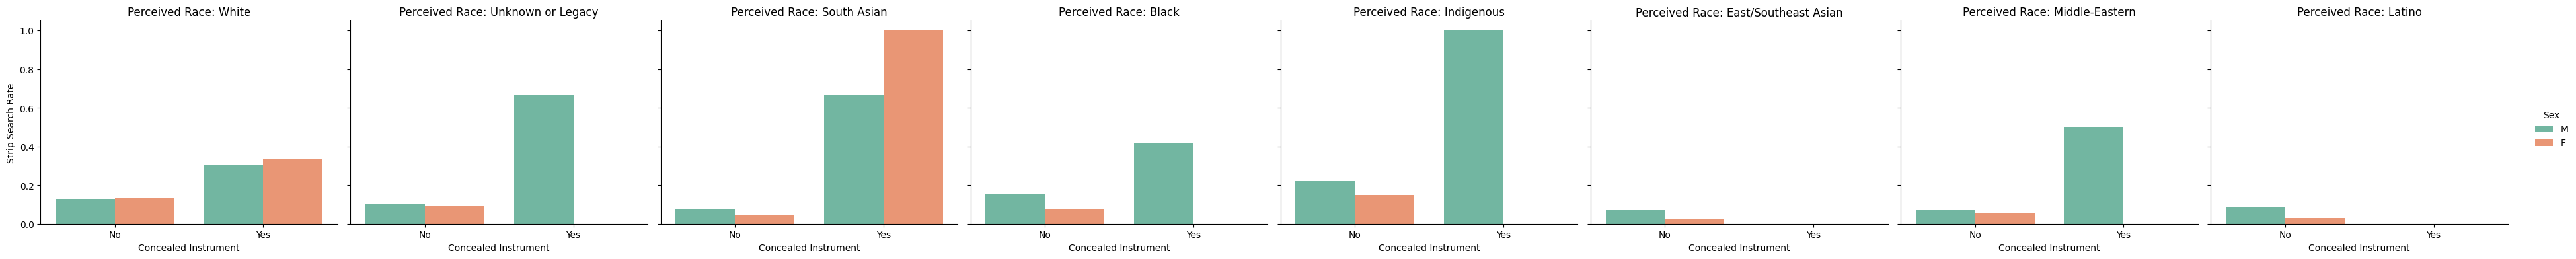

<ipython-input-46-4f446162f112>:21: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  g = sns.catplot(data=df_filtered, x=action_col, y='StripSearch', hue='Sex', col='Perceived_Race', kind='bar', ci=None,


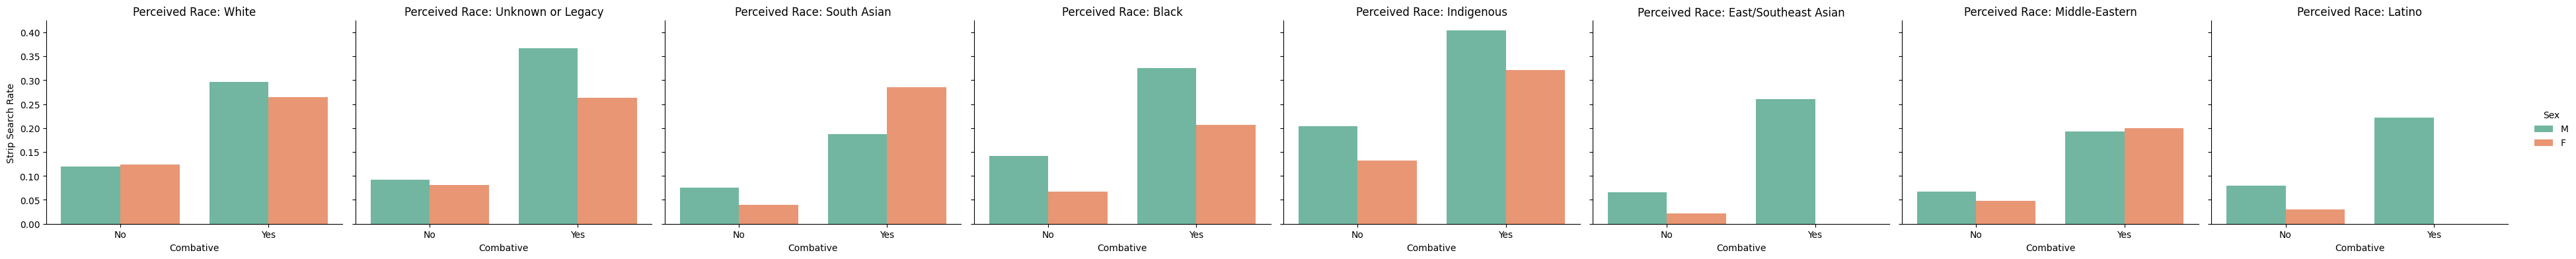

<ipython-input-46-4f446162f112>:21: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  g = sns.catplot(data=df_filtered, x=action_col, y='StripSearch', hue='Sex', col='Perceived_Race', kind='bar', ci=None,


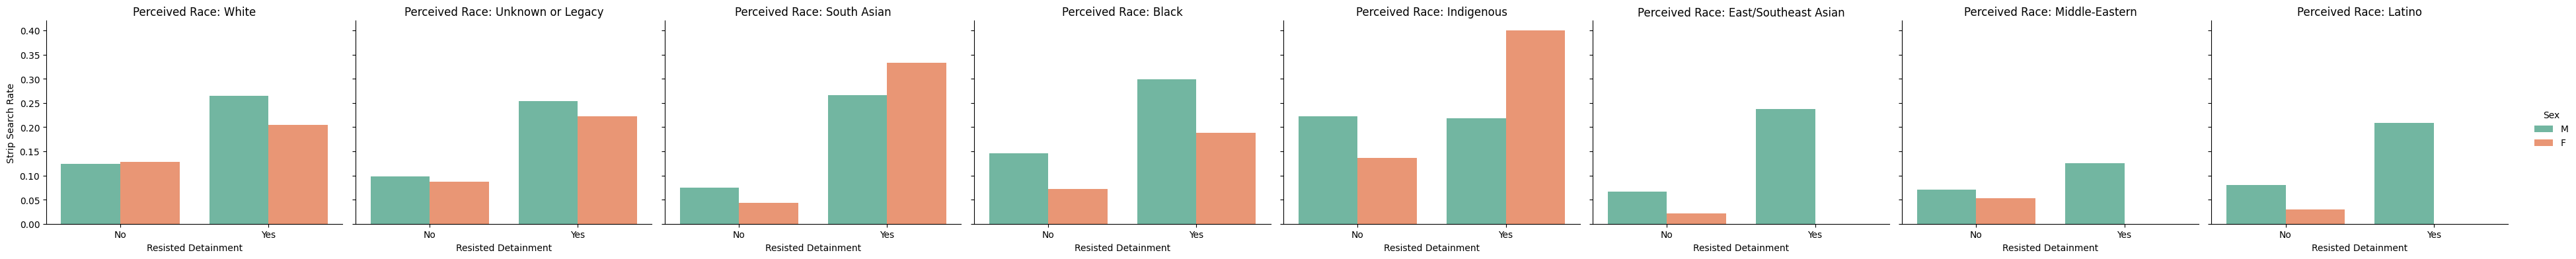

<ipython-input-46-4f446162f112>:21: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  g = sns.catplot(data=df_filtered, x=action_col, y='StripSearch', hue='Sex', col='Perceived_Race', kind='bar', ci=None,


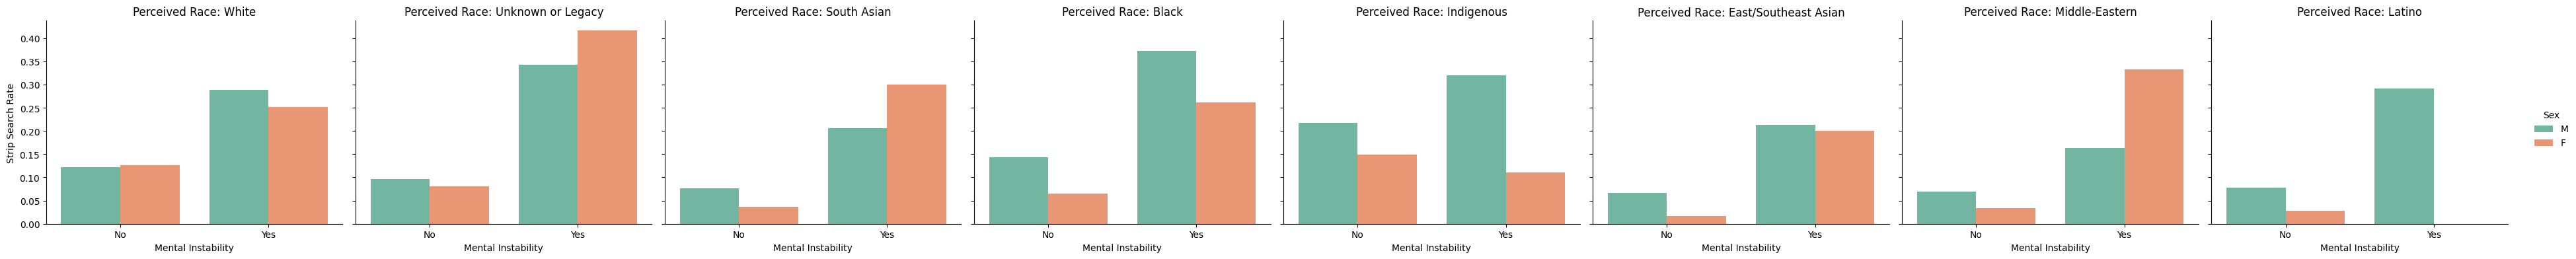

<ipython-input-46-4f446162f112>:21: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  g = sns.catplot(data=df_filtered, x=action_col, y='StripSearch', hue='Sex', col='Perceived_Race', kind='bar', ci=None,


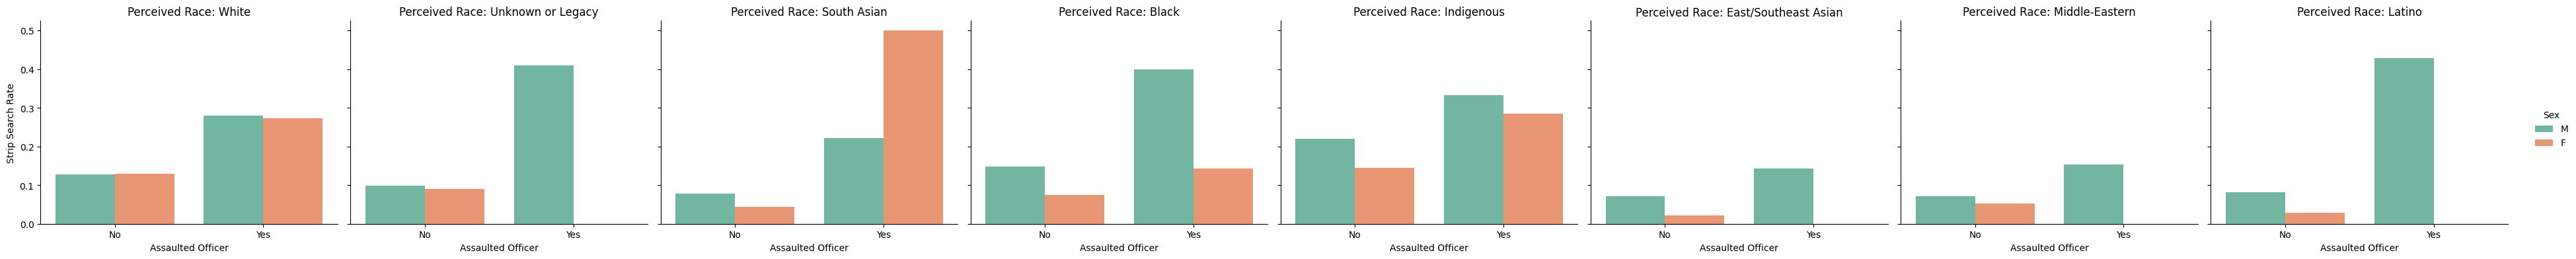

In [46]:
# Visualization of Stripsearch rates based on perceived race and actions at arrest
palette = sns.color_palette("Set2")
actions_labels = [
    "Concealed Instrument",
    "Combative",
    "Resisted Detainment",
    "Mental Instability",
    "Assaulted Officer",
    "Others"
]

actions_at_arrest_reasons = [
    'Actions_at_arrest___Concealed_i',
    'Actions_at_arrest___Combative__',
    'Actions_at_arrest___Resisted__d',
    'Actions_at_arrest___Mental_inst',
    'Actions_at_arrest___Assaulted_o',
]

for i, action_col in enumerate(actions_at_arrest_reasons):
    g = sns.catplot(data=df_filtered, x=action_col, y='StripSearch', hue='Sex', col='Perceived_Race', kind='bar', ci=None,
                    height=4, aspect=1.2, palette=palette)
    plt.xticks([0, 1], ['No', 'Yes'])
    for ax, race in zip(g.axes.flat, df_filtered['Perceived_Race'].unique()):
        ax.set_title(f"Perceived Race: {race}")
    g.set_xlabels(actions_labels[i])
    g.set_ylabels("Strip Search Rate")
    plt.show()

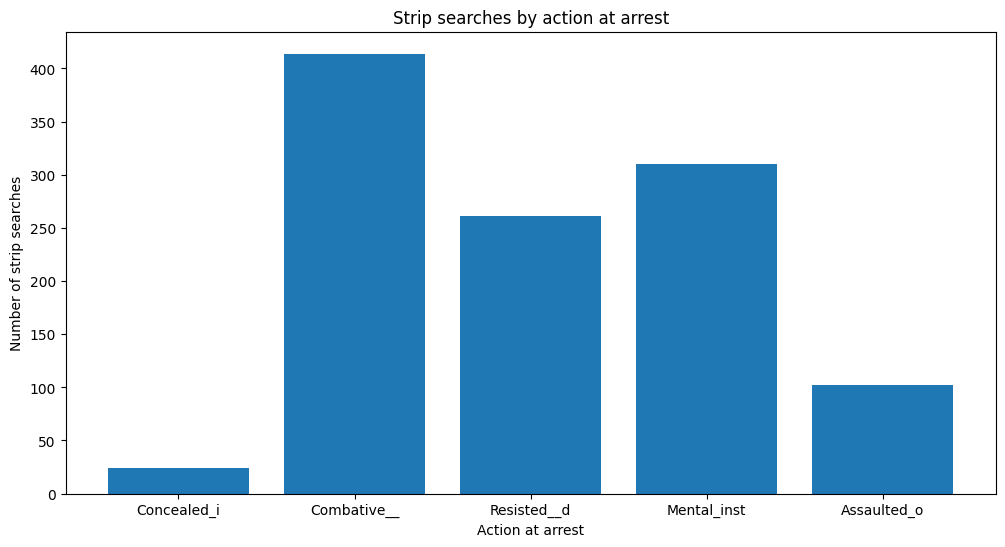

In [ ]:
actions = [
    "Concealed_i",
    "Combative__",
    "Resisted__d",
    "Mental_inst",
    "Assaulted_o"
]

counts = [df[df[f"Actions_at_arrest___{action}"] == 1]["StripSearch"].sum() for action in actions]

plt.figure(figsize=(12, 6))
plt.bar(actions, counts)
plt.xlabel("Action at arrest")
plt.ylabel("Number of strip searches")
plt.title("Strip searches by action at arrest")
plt.show()

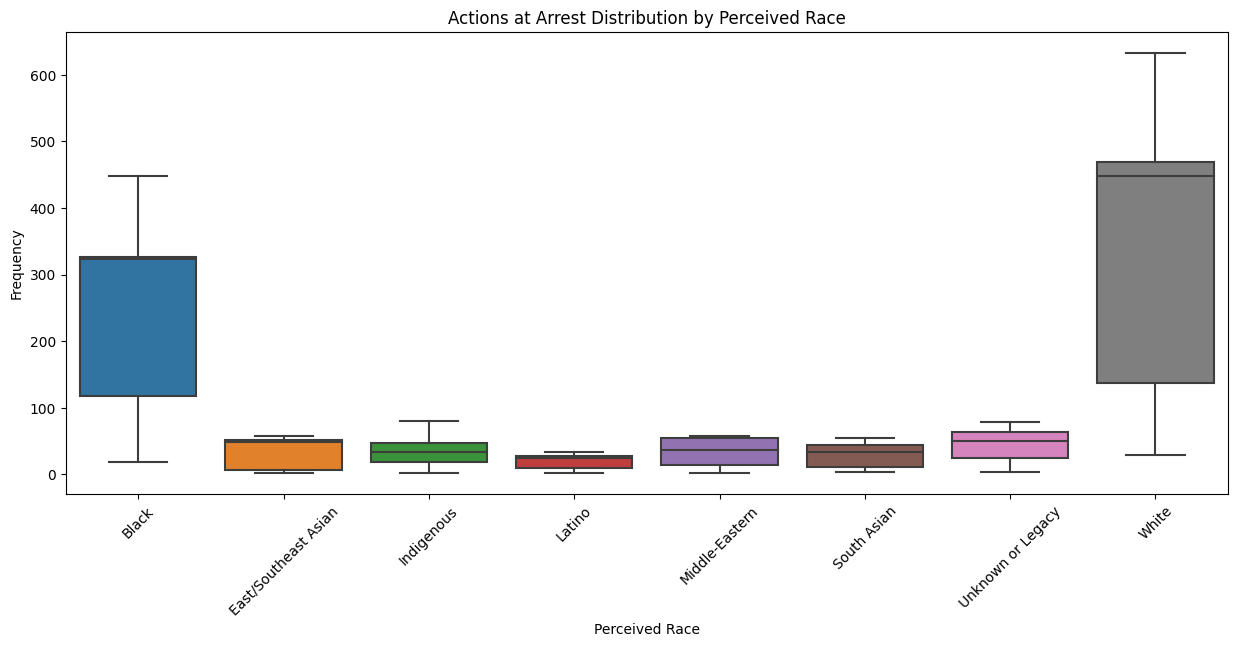

In [47]:
#Actions at Arrest Distribution by Perceived Race
plt.figure(figsize=(15, 6))
actions_at_arrest_sum = df_filtered.groupby('Perceived_Race')[actions_at_arrest_reasons].sum().reset_index()
melted_actions_at_arrest = pd.melt(actions_at_arrest_sum, id_vars=['Perceived_Race'], value_vars=actions_at_arrest_reasons)

sns.boxplot(data=melted_actions_at_arrest, x='Perceived_Race', y='value')
plt.xticks(rotation=45)
plt.title('Actions at Arrest Distribution by Perceived Race')
plt.xlabel('Perceived Race')
plt.ylabel('Frequency')
plt.show()

<ipython-input-32-971a65958a53>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped = df.groupby(['Sex', 'Age_group__at_arrest_']).mean()['StripSearch'].reset_index()


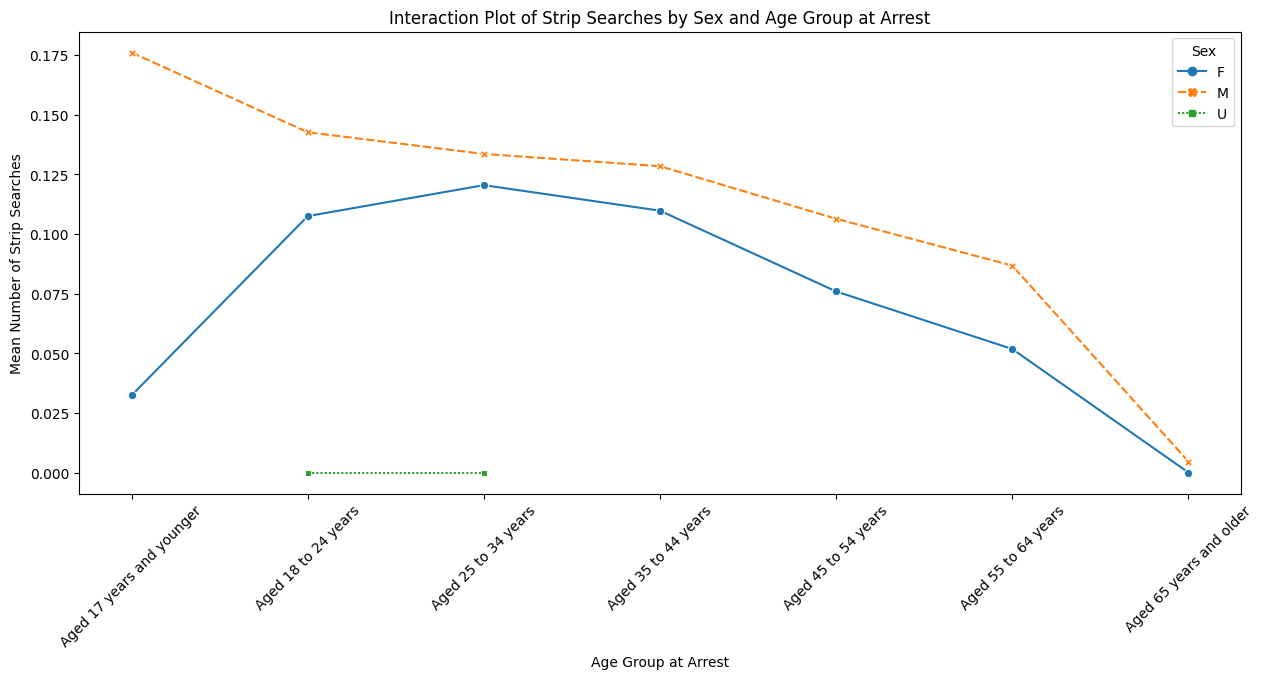

In [ ]:
#Interaction Plot of Strip Searches by Sex and Age Group at Arrest
grouped = df.groupby(['Sex', 'Age_group__at_arrest_']).mean()['StripSearch'].reset_index()

plt.figure(figsize=(15, 6))
sns.lineplot(data=grouped, x='Age_group__at_arrest_', y='StripSearch', hue='Sex', style='Sex', markers=True)
plt.title('Interaction Plot of Strip Searches by Sex and Age Group at Arrest')
plt.xlabel('Age Group at Arrest')
plt.ylabel('Mean Number of Strip Searches')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Use t-test to compare the mean of age if they were strip searched
# select the columns of interest
subset = df[['StripSearch', 'Age_numerical']]

# drop missing values
subset = subset.dropna()

# perform t-test for age group by strip search
age_strip_search = subset.groupby('StripSearch')['Age_numerical'].apply(list)
t_age, p_age = ttest_ind(age_strip_search[1], age_strip_search[0])

# calculate means and CI
mean_strip_searched = np.mean(age_strip_search[1])
mean_not_strip_searched = np.mean(age_strip_search[0])
std_strip_searched = np.std(age_strip_search[1], ddof=1)
std_not_strip_searched = np.std(age_strip_search[0], ddof=1)
n_strip_searched = len(age_strip_search[1])
n_not_strip_searched = len(age_strip_search[0])
ci_low_strip_searched, ci_high_strip_searched = t.interval(0.95, n_strip_searched-1, loc=mean_strip_searched, scale=std_strip_searched)
ci_low_not_strip_searched, ci_high_not_strip_searched = t.interval(0.95, n_not_strip_searched-1, loc=mean_not_strip_searched, scale=std_not_strip_searched)

# print the results
print('T-test for Age group by Strip Search: t =', t_age, ', p =', p_age)
print('Mean age for strip searched:', mean_strip_searched, ', 95% CI:', ci_low_strip_searched, ci_high_strip_searched)
print('Mean age for not strip searched:', mean_not_strip_searched, ', 95% CI:', ci_low_not_strip_searched, ci_high_not_strip_searched)

T-test for Age group by Strip Search: t = -9.171294098626364 , p = 4.987637040848979e-20
Mean age for strip searched: 34.85158371040724 , 95% CI: 13.35038780577559 56.35277961503889
Mean age for not strip searched: 36.90573820706555 , 95% CI: 12.898704008796276 60.912772405334835


In [ ]:
# Use t-test to compare the mean of age if they had actions at arrest
# combine all types of actions at arrest into one variable
df['Actions_at_arrest'] = df['Actions_at_arrest___Concealed_i'] | df['Actions_at_arrest___Combative__'] | df['Actions_at_arrest___Resisted__d'] | df['Actions_at_arrest___Mental_inst'] | df['Actions_at_arrest___Assaulted_o']

# select the columns of interest
subset = df[['Actions_at_arrest', 'Age_numerical']]

# drop missing values
subset = subset.dropna()

# perform t-test for actions at arrest
age_actions_at_arrest = subset.groupby('Actions_at_arrest')['Age_numerical'].apply(list)
t_age, p_age = ttest_ind(age_actions_at_arrest[1], age_actions_at_arrest[0])

# calculate means and CI
mean_yes = np.mean(age_actions_at_arrest[1])
mean_no = np.mean(age_actions_at_arrest[0])
std_yes = np.std(age_actions_at_arrest[1], ddof=1)
std_no = np.std(age_actions_at_arrest[0], ddof=1)
n_yes = len(age_actions_at_arrest[1])
n_no = len(age_actions_at_arrest[0])
ci_low_yes, ci_high_yes = t.interval(0.95, n_yes-1, loc=mean_yes, scale=std_yes)
ci_low_no, ci_high_no = t.interval(0.95, n_no-1, loc=mean_no, scale=std_no)

# print the results
print('T-test for Age group by Actions at Arrest: t =', t_age, ', p =', p_age)
print('Mean age for Actions at Arrest:', mean_yes, ', 95% CI:', ci_low_yes, ci_high_yes)
print('Mean age for no Actions at Arrest:', mean_no, ', 95% CI:', ci_low_no, ci_high_no)

T-test for Age group by Actions at Arrest: t = -4.109238884187431 , p = 3.9810257402077734e-05
Mean age for Actions at Arrest: 35.77198581560284 , 95% CI: 14.043874367244428 57.50009726396125
Mean age for no Actions at Arrest: 36.7611289031225 , 95% CI: 12.792712794532214 60.72954501171278


In [ ]:
# Use t-test to compare the mean of age committing a crime if they are male or female
# select the columns of interest
subset = df[['Gender', 'Age_numerical']]

# drop missing values
subset = subset.dropna()

# perform t-test for age group by strip search
age_gender = subset.groupby('Gender')['Age_numerical'].apply(list)
t_age, p_age = ttest_ind(age_gender[1], age_gender[2])

# calculate means and CI
mean_yes = np.mean(age_gender[1])
mean_no = np.mean(age_gender[2])
std_yes = np.std(age_gender[1], ddof=1)
std_no = np.std(age_gender[2], ddof=1)
n_yes = len(age_gender[1])
n_no = len(age_gender[2])
ci_low_yes, ci_high_yes = t.interval(0.95, n_yes-1, loc=mean_yes, scale=std_yes)
ci_low_no, ci_high_no = t.interval(0.95, n_no-1, loc=mean_no, scale=std_no)

# print the results
print('T-test for Age group committing a crime by gender: t =', t_age, ', p =', p_age)
print('Mean age for male:', mean_yes, ', 95% CI:', ci_low_yes, ci_high_yes)
print('Mean age for female:', mean_no, ', 95% CI:', ci_low_no, ci_high_no)

T-test for Age group committing a crime by gender: t = 12.064157566415954 , p = 1.9799046340425986e-33
Mean age for male: 37.1215459469384 , 95% CI: 13.265803834445265 60.97728805943153
Mean age for female: 34.99650582362729 , 95% CI: 11.884964001437108 58.108047645817464


In [ ]:
# Use t-test to compare the mean of age in if they were booked
# select the columns of interest
subset = df[['Booked', 'Age_numerical']]

# drop missing values
subset = subset.dropna()

# perform t-test for age group by strip search
age_booked = subset.groupby('Booked')['Age_numerical'].apply(list)
t_age, p_age = ttest_ind(age_booked[0], age_booked[1])

# calculate means and CI
mean_yes = np.mean(age_booked[1])
mean_no = np.mean(age_booked[0])
std_yes = np.std(age_booked[1], ddof=1)
std_no = np.std(age_booked[0], ddof=1)
n_yes = len(age_booked[1])
n_no = len(age_booked[0])
ci_low_yes, ci_high_yes = t.interval(0.95, n_yes-1, loc=mean_yes, scale=std_yes)
ci_low_no, ci_high_no = t.interval(0.95, n_no-1, loc=mean_no, scale=std_no)

# print the results
print('T-test for Age group by booked: t =', t_age, ', p =', p_age)
print('Mean age for booked:', mean_yes, ', 95% CI:', ci_low_yes, ci_high_yes)
print('Mean age for not booked:', mean_no, ', 95% CI:', ci_low_no, ci_high_no)

T-test for Age group by booked: t = 3.5413068168780226 , p = 0.0003988014657899501
Mean age for booked: 36.42430675335014 , 95% CI: 13.754704255961926 59.09390925073835
Mean age for not booked: 36.94090837655194 , 95% CI: 11.965585356900714 61.91623139620316


In [ ]:
# Use t-test to compare the mean of age in different year
# select the columns of interest
subset = df[['Arrest_Year', 'Age_numerical']]

# drop missing values
subset = subset.dropna()

# perform t-test for age group by strip search
age_year = subset.groupby('Arrest_Year')['Age_numerical'].apply(list)
t_age, p_age = ttest_ind(age_year[2020], age_year[2021])

# calculate means and CI
mean_yes = np.mean(age_year[2021])
mean_no = np.mean(age_year[2020])
std_yes = np.std(age_year[2021], ddof=1)
std_no = np.std(age_year[2020], ddof=1)
n_yes = len(age_year[2021])
n_no = len(age_year[2020])
ci_low_yes, ci_high_yes = t.interval(0.95, n_yes-1, loc=mean_yes, scale=std_yes)
ci_low_no, ci_high_no = t.interval(0.95, n_no-1, loc=mean_no, scale=std_no)

# print the results
print('T-test for Age group by year: t =', t_age, ', p =', p_age)
print('Mean age for 2021:', mean_yes, ', 95% CI:', ci_low_yes, ci_high_yes)
print('Mean age for 2020:', mean_no, ', 95% CI:', ci_low_no, ci_high_no)

T-test for Age group by year: t = -8.524353528898782 , p = 1.6133457462140445e-17
Mean age for 2021: 37.35253661299458 , 95% CI: 14.922051320729476 59.78302190525967
Mean age for 2020: 36.107117414675216 , 95% CI: 11.391000438645563 60.82323439070487


#Hypothesis Test

###Research Question 1: (Power Analysis)
What is the minimum sample size required to detect a statistically significant difference in strip search rates between different racial, gender, and age groups with a specified effect size, level of significance, and power?

Null Hypothesis (H0): There is no statistically significant difference in strip search rates between different racial, gender, and age groups. Any observed differences in strip search rates are due to random variation.

Alternative Hypothesis (HA): There is a statistically significant difference in strip search rates between different racial, gender, and age groups. The observed differences in strip search rates are not solely due to random variation.

In [ ]:
from statsmodels.stats.power import FTestAnovaPower

# Set parameters for the power analysis
effect_size = 0.05  # Difference between the groups (e.g., 0.05 standard deviations)
alpha = 0.05        # Level of significance (commonly set at 0.05)
power = 0.8         # Desired power (commonly set at 0.8)
n_groups_race = 8   # Number of racial groups (e.g., "White" and "Black")
n_groups_gender = 3 # Number of gender groups (e.g., "Male", "Female", "Unknown")
n_groups_age = 7    # Number of age groups (e.g., "<18", "18-24", "25-34", "35-44", "45-54", "55-64", "65+")
n_groups_total = n_groups_race * n_groups_gender * n_groups_age

# Perform power analysis
power_analysis = FTestAnovaPower()
min_sample_size = power_analysis.solve_power(effect_size=effect_size, alpha=alpha, power=power, k_groups=n_groups_total)

# Print the results
print("Minimum sample size per group:", np.ceil(min_sample_size))

Minimum sample size per group: 20445.0


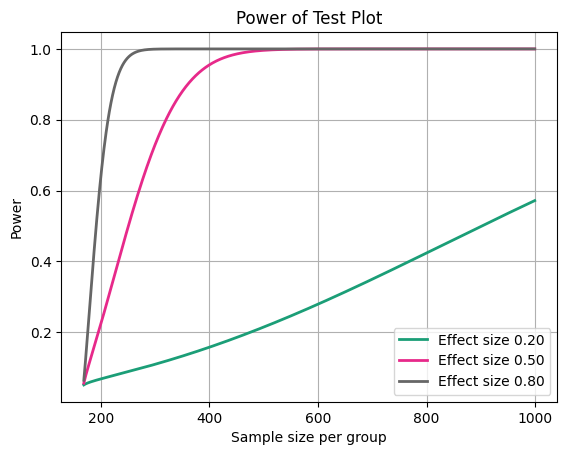

In [ ]:
# Define effect sizes and sample sizes for the plot
effect_sizes = np.array([0.2, 0.5, 0.8])
sample_sizes = np.array(range(5, 1000))

# Plot power curves
power_analysis.plot_power(dep_var='nobs', nobs=sample_sizes, effect_size=effect_sizes, alpha=alpha, k_groups=n_groups_total)
plt.xlabel('Sample size per group')
plt.ylabel('Power')
plt.title('Power of Test Plot')
plt.legend([f'Effect size {es:.2f}' for es in effect_sizes])
plt.grid()
plt.show()

In [ ]:
rows, columns = df.shape

# Print the size of the dataset
print(f"The dataset has {rows} rows and {columns} columns.")

The dataset has 27800 rows and 28 columns.


### Research Question 2: (ANCOVA)
Are there significant differences in strip search rates between different racial, gender, and age groups after controlling for covariates such as the type of action taken at arrest?

Null Hypothesis (H0): There are no significant differences in strip search rates between different racial, gender, and age groups after controlling for covariates such as the type of action taken at arrest.

Alternative Hypothesis (HA): There are significant differences in strip search rates between different racial, gender, and age groups after controlling for covariates such as the type of action taken at arrest.

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

def clean_column_name(column_name):
    return (column_name.replace(" ", "_")
                    .replace("-", "_")
                    .replace("(", "_")
                    .replace(")", "_")
                    .replace(".", "")
                    .replace("/", "_"))

subset = df[['Actions_at_arrest', 'StripSearch', 'Perceived_Race', 'Sex', 'Age_group__at_arrest_']]

# Create dummy variables for categorical factors (Race, Gender, Age)
subset = pd.get_dummies(subset, columns=['Perceived_Race', 'Sex', 'Age_group__at_arrest_'], drop_first=True)

# Clean up column names
subset.columns = [clean_column_name(col) for col in subset.columns]

# Prepare the covariate columns (e.g., 'Actions_at_arrest')
subset['Actions_at_arrest'] = subset['Actions_at_arrest'].astype(float)

# Run the multiple regression analysis
formula = 'StripSearch ~ ' + ' + '.join(subset.columns.difference(['StripSearch']))
model = smf.ols(formula, data=subset).fit()

# Print the results
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:            StripSearch   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     61.00
Date:                Sun, 16 Apr 2023   Prob (F-statistic):          5.08e-194
Time:                        19:08:07   Log-Likelihood:                -7642.1
No. Observations:               27800   AIC:                         1.532e+04
Df Residuals:                   27783   BIC:                         1.546e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

### Research Question 3: (Logistic Regression)
What is the association between race, gender, age group, and type of action taken at arrest on the likelihood of a strip search being conducted?

Null Hypothesis (H0): There is no association between race, gender, age group, and type of action taken at arrest on the likelihood of a strip search being conducted.

Alternative Hypothesis (HA): There is an association between race, gender, age group, and type of action taken at arrest on the likelihood of a strip search being conducted.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils import resample

# Dataset cleaning
def clean_column_name(column_name):
    return (column_name.replace(" ", "_")
                    .replace("-", "_")
                    .replace("(", "_")
                    .replace(")", "_")
                    .replace(".", "")
                    .replace("/", "_"))

subset = df[['Actions_at_arrest', 'StripSearch', 'Perceived_Race', 'Sex', 'Age_group__at_arrest_']]

# Create dummy variables for categorical factors (Race, Gender, Age)
subset = pd.get_dummies(subset, columns=['Perceived_Race', 'Sex', 'Age_group__at_arrest_'], drop_first=True)

# Clean up column names
subset.columns = [clean_column_name(col) for col in subset.columns]

# Prepare the covariate columns (e.g., 'Actions_at_arrest')
subset['Actions_at_arrest'] = subset['Actions_at_arrest'].astype(float)

# Train-test split
train_subset, test_subset = train_test_split(subset, test_size=0.2, random_state=42)

# Running logistic regression
formula = 'StripSearch ~ ' + ' + '.join(subset.columns.difference(['StripSearch']))
logit_model = smf.logit(formula, data=train_subset).fit()

# Print the results
print(logit_model.summary())

# Assess the model
y_pred = (logit_model.predict(test_subset) > 0.5).astype(int)
y_test = test_subset["StripSearch"]
print(classification_report(y_test, y_pred))

         Current function value: 0.348516
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:            StripSearch   No. Observations:                22240
Model:                          Logit   Df Residuals:                    22223
Method:                           MLE   Df Model:                           16
Date:                Sun, 16 Apr 2023   Pseudo R-squ.:                 0.04461
Time:                        19:08:09   Log-Likelihood:                -7751.0
converged:                      False   LL-Null:                       -8112.9
Covariance Type:            nonrobust   LLR p-value:                1.125e-143
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
Intercept                                        -2.3046      0.116    -19

/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set t

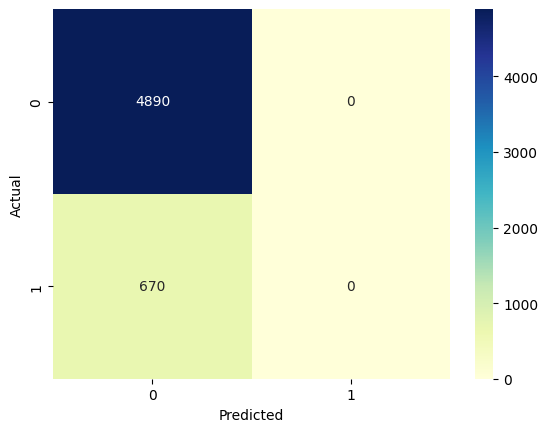

In [ ]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

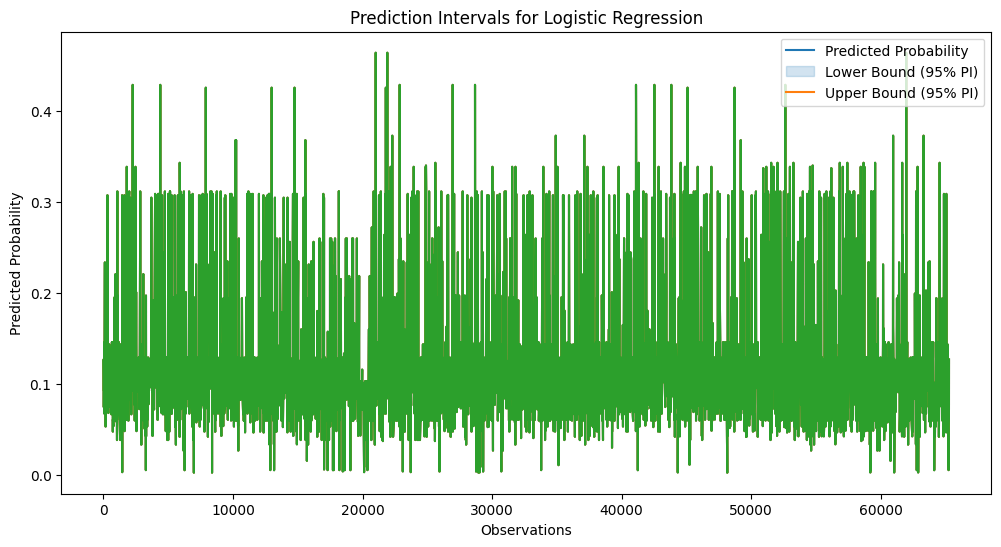

In [ ]:
# Prediction interval plot
predicted_prob = logit_model.predict(test_subset)

# Calculate the confidence intervals
ci = logit_model.conf_int(alpha=0.05)

# Create a new DataFrame for the predicted probabilities with the confidence intervals
results_df = pd.DataFrame(
    {
        "Predicted Probability": predicted_prob,
        "Lower Bound (95% CI)": logit_model.predict(test_subset, transform=lambda x: x - ci.loc[x.name, 0]),
        "Upper Bound (95% CI)": logit_model.predict(test_subset, transform=lambda x: x + ci.loc[x.name, 1]),
    }
)

# Create the plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=results_df, dashes=False)
plt.ylabel("Predicted Probability")
plt.xlabel("Observations")
plt.title("Prediction Intervals for Logistic Regression")
plt.legend(["Predicted Probability", "Lower Bound (95% PI)", "Upper Bound (95% PI)"])
plt.show()

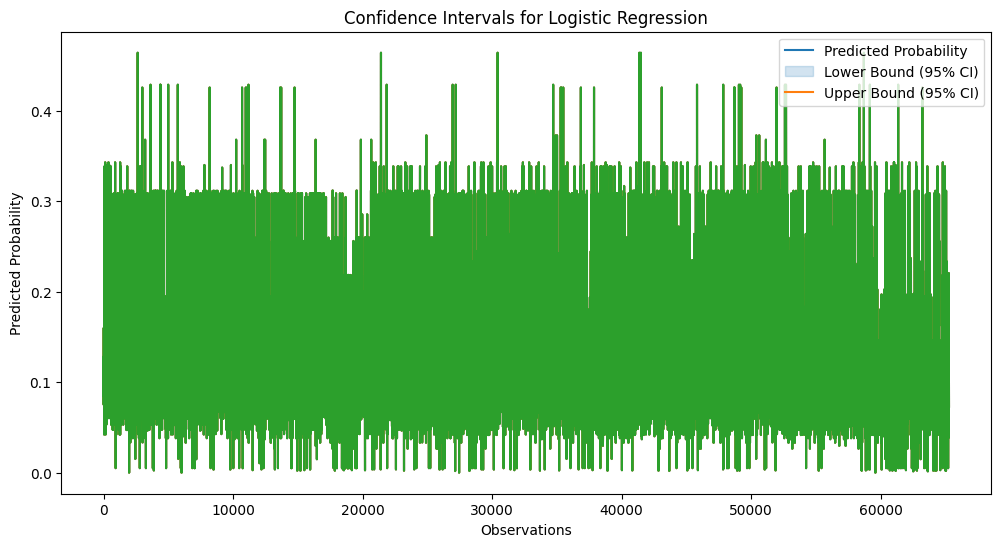

In [ ]:
# Confidence intervals plot
predicted_prob = logit_model.predict(train_subset)

# Calculate the confidence intervals
ci = logit_model.conf_int(alpha=0.05)

# Create a new DataFrame for the predicted probabilities with the confidence intervals
results_df_ci = pd.DataFrame(
    {
        "Predicted Probability": predicted_prob,
        "Lower Bound (95% CI)": logit_model.predict(train_subset, transform=lambda x: x - ci.loc[x.name, 0]),
        "Upper Bound (95% CI)": logit_model.predict(train_subset, transform=lambda x: x + ci.loc[x.name, 1]),
    }
)

# Create the plot for confidence intervals
plt.figure(figsize=(12, 6))
sns.lineplot(data=results_df_ci, dashes=False)
plt.ylabel("Predicted Probability")
plt.xlabel("Observations")
plt.title("Confidence Intervals for Logistic Regression")
plt.legend(["Predicted Probability", "Lower Bound (95% CI)", "Upper Bound (95% CI)"])
plt.show()